In [1]:
#extract the np arrays from the csv files
import numpy as np
V1 = np.loadtxt('D:/Data/Matlab/VN1_3_0.0_1.csv',dtype = float)
V2 = np.loadtxt('D:/Data/Matlab/VN2_3_0.0_1.csv', dtype= float)
t  = np.loadtxt('D:/Data/Matlab/Time_3_0.0_1.csv', dtype= float)

In [2]:
#latest update => dont make it a spike train, it causes everything to be step functions and not smooth
y1 = V1
y2 = V2

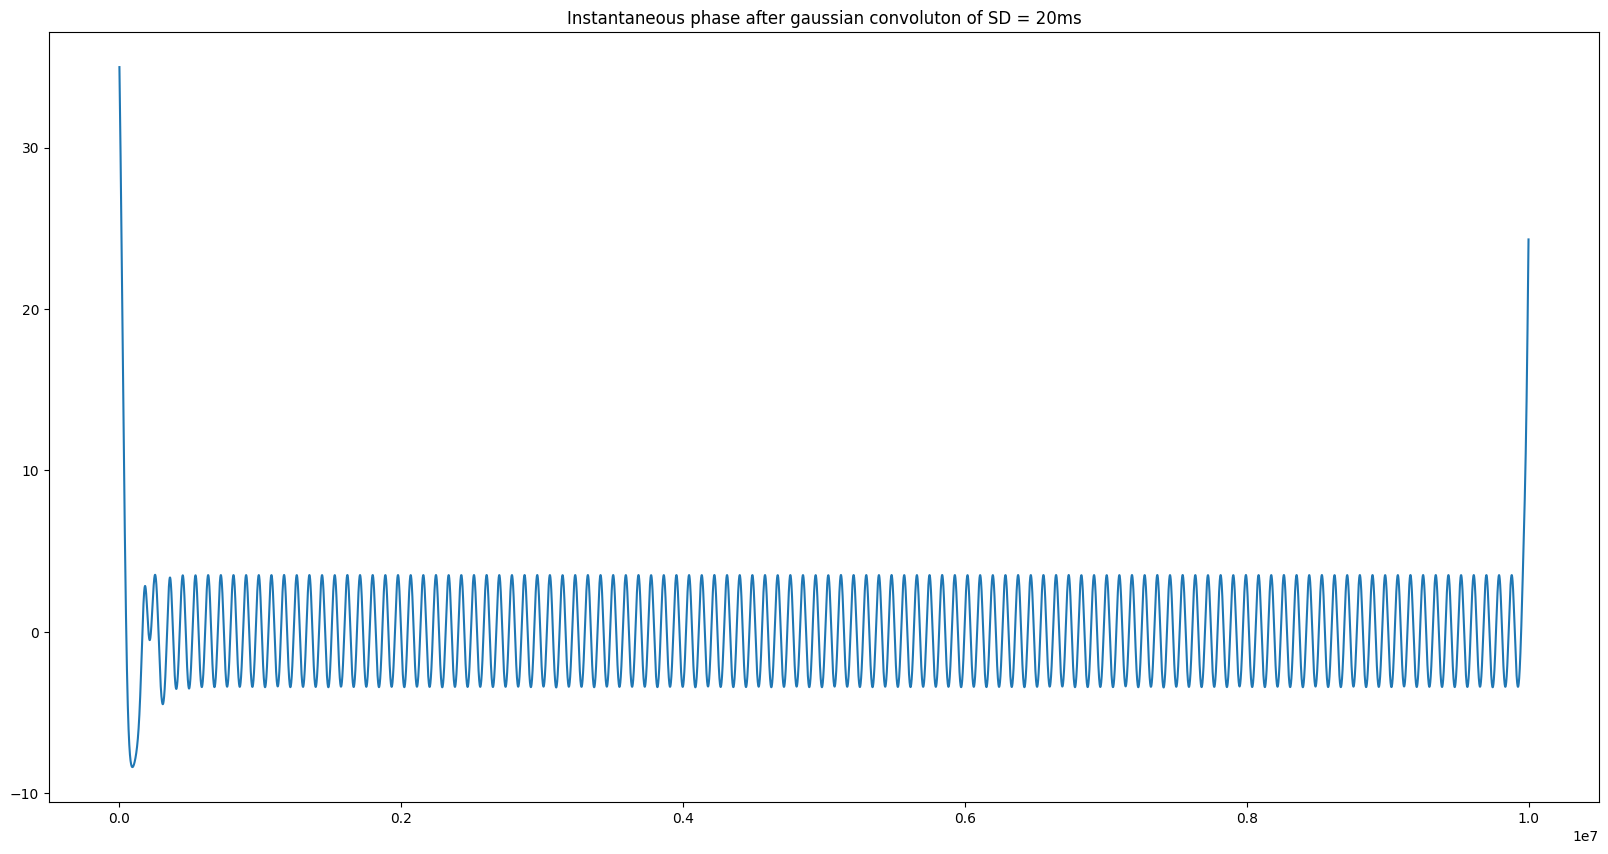

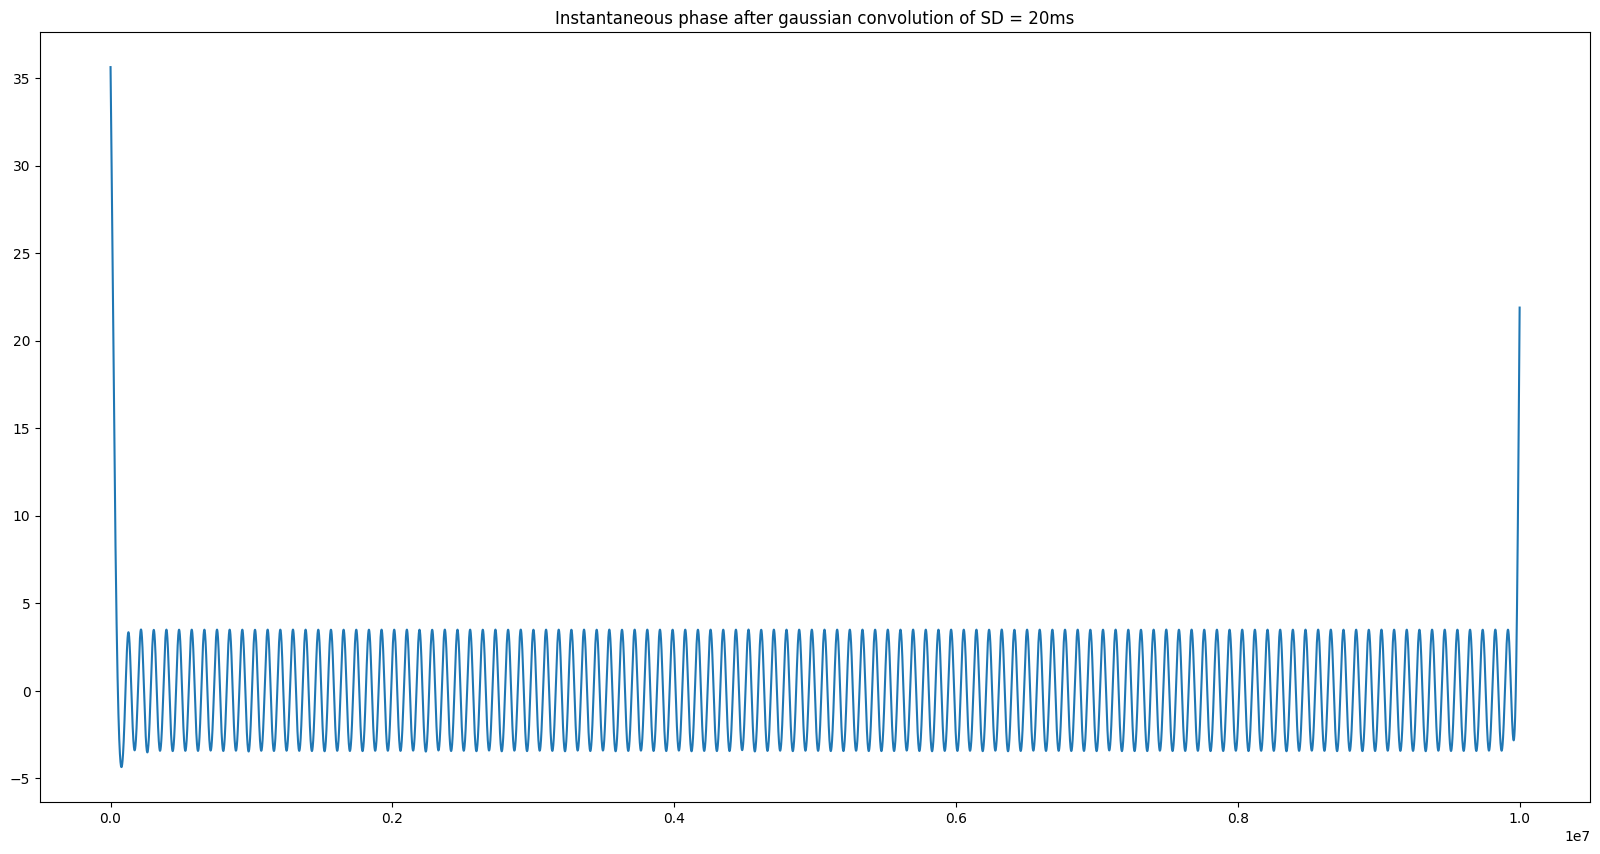

In [9]:
#the spike train is then windowed into a gaussian curve, where the peak is at each burst and the trough is at the non-spiking region
#the signal convolution prevents any kind of noise generated by the signal at smaller timescales that are not in our roi
from scipy import signal
sd = 20000 #20ms
win = signal.windows.gaussian(len(y1),sd)
filter = signal.convolve(y1, win, mode='same') / sum(win)
filtered = filter - np.mean(filter)
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.title("Instantaneous phase after gaussian convoluton of SD = 20ms" )
plt.plot(filtered)

win2 = signal.windows.gaussian(len(y2),sd)
filter2 = signal.convolve(y2, win2, mode='same') / sum(win2)
filtered2 = filter2 - np.mean(filter2)
plt.figure(figsize=(20,10))
plt.title("Instantaneous phase after gaussian convolution of SD = 20ms")
plt.plot(filtered2)

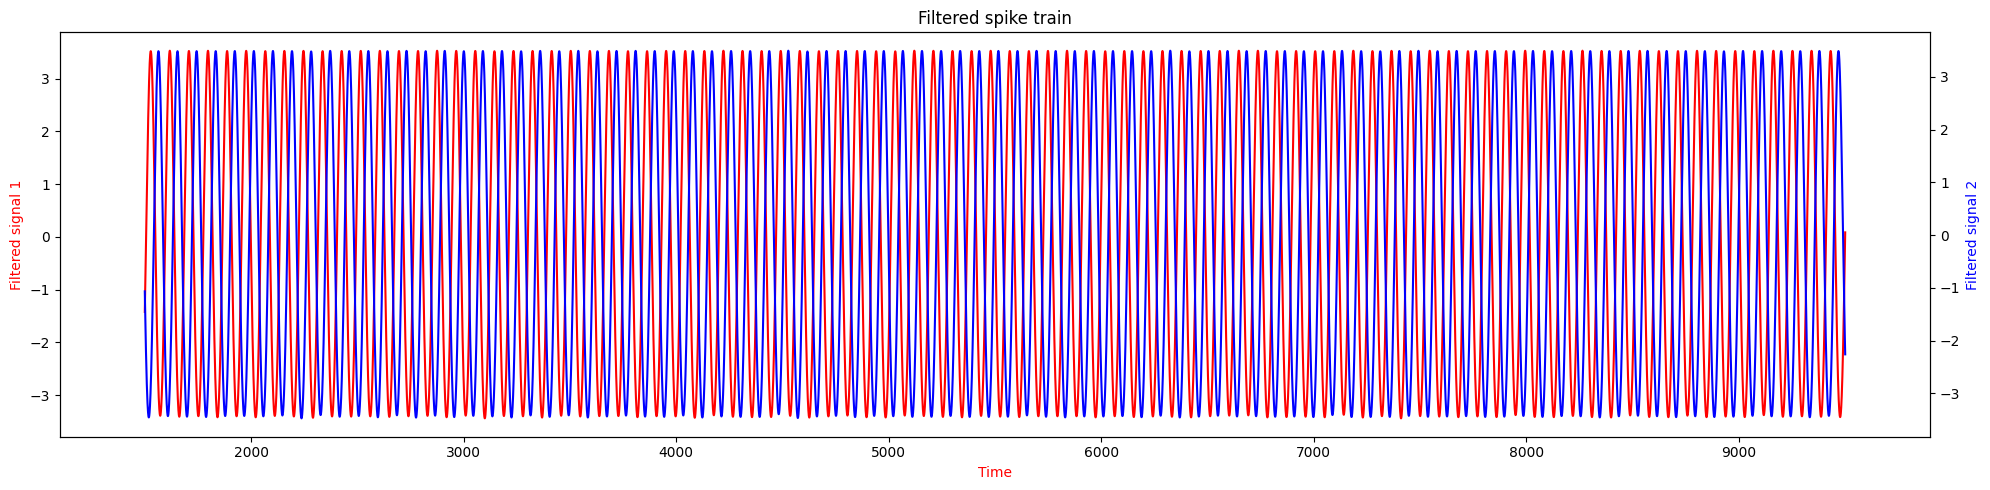

In [10]:
#Remove the initial noisy data of 1.5s after which the steady state behavior is observed and the last 0.5 secs
time = t[1500000:9500000]
# y-axis values
xy1 = filtered[1500000:9500000]
 
# secondary y-axis values
xy2 = filtered2[1500000:9500000]
 
# plotting figures by creating aexs object
# using subplots() function
fig, ax = plt.subplots(figsize = (20, 5))
plt.title('Filtered spike train')
 
# using the twinx() for creating another
# axes object for secondary y-Axis

ax.plot(time, xy1, color = 'r')
ax2 = ax.twinx()
ax2.plot(time, xy2, color = 'b')
 
# giving labels to the axises
ax.set_xlabel('Time', color = 'r')
ax.set_ylabel('Filtered signal 1', color = 'r')
 
# secondary y-axis label
ax2.set_ylabel('Filtered signal 2', color = 'b')
 
# defining display layout
plt.tight_layout()
 
# show plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


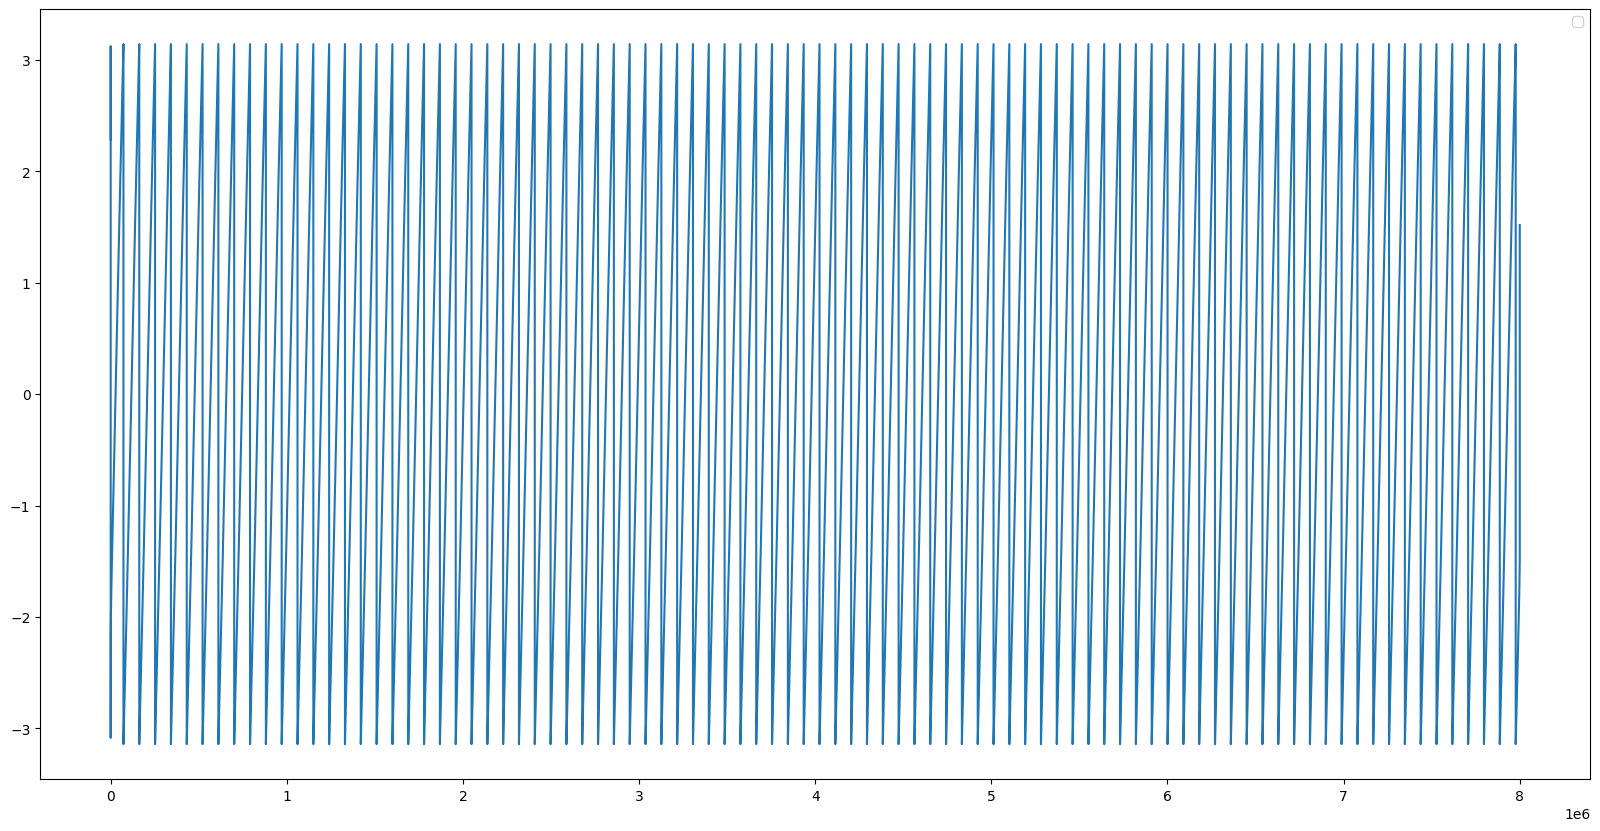

In [11]:
#We have a gaussian curve, converting their analytical signal into instantaneous phases
from scipy.signal import hilbert

phase=[[],[]]
phase[0]=np.angle(hilbert(xy1))
phase[1]=np.angle(hilbert(xy2))

plt.figure(figsize=(20,10))
#plt.plot(xy1)
plt.plot(phase[0])
plt.legend()

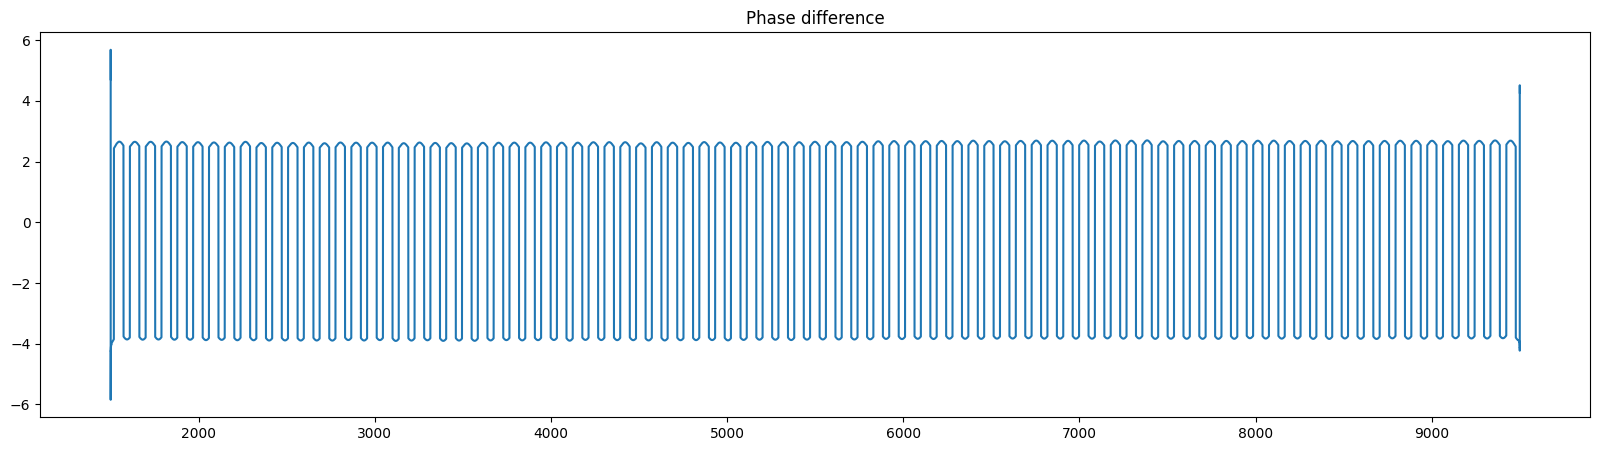

In [14]:
phasedifference = phase[0]- phase[1]    #phi_x-phi_y given time t = theta(t)
c= np.zeros(len(phasedifference), dtype=complex)
for i in range(len(phasedifference)):
    c[i]= complex(0,phasedifference[i])    #i*theta(t)
exponent = np.exp(c)
sumofexpo = np.sum(exponent)
magnitude = abs(sumofexpo)
N = len(exponent)
sync = magnitude/N

plt.figure(figsize=(20,5))
plt.plot(time, phasedifference)
plt.title("Phase difference")
plt.show()



In [15]:
sync

0.9962987737307811

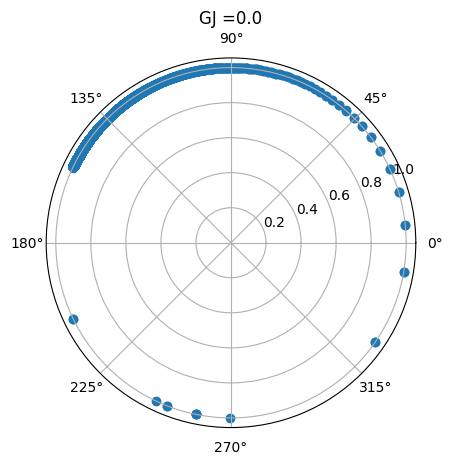

In [17]:
theta = phasedifference
r = np.ones(len(theta))
fig,ax =plt.subplots(subplot_kw = {'projection':'polar'})
ax.scatter(theta,r)
ax.set_title("GJ =0.0")
plt.show()

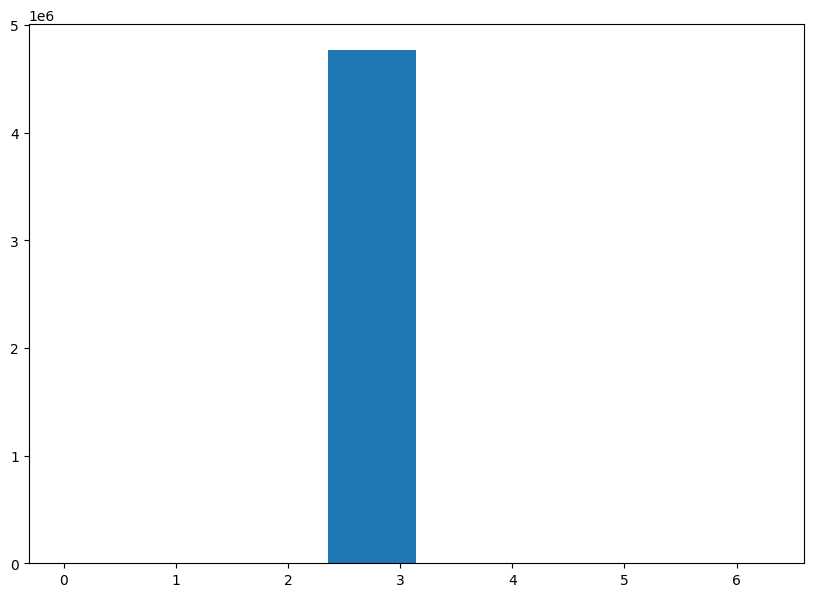

In [18]:
# Creating dataset
a = theta
 
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(a, bins = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4, 2*np.pi])
 
# Show plot
plt.show()